# 분류(Classification)
### 03_서포트 벡터 머신(Support Vector Machine, SVM)

In [1]:
# 필요 라이브러리 임포트
print(__doc__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 데이터 전처리
from sklearn.cross_validation import train_test_split
# 모델 설정
from sklearn.svm import SVC # 서포트 벡터 머신 알고리즘 적용을 위한 라이브러리
from sklearn.svm import LinearSVC # 서포트 벡터 머신 알고리즘 적용을 위한 라이브러리
from sklearn import svm
# 모델 평가
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
# 모델 최적화
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
# IPython에서 이미지 출력
from IPython.display import Image
## Matplotlib에서 한글 사용
from matplotlib import font_manager, rc
font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
## Numpy 배열의 출력환경
np.set_printoptions(linewidth=400)    # 화면 너비 지정
np.set_printoptions(threshold=np.inf) # 전체 Numpy 배열 출력
## Graphviz 사용
from sklearn.tree import export_graphviz # Dot Language를 이용한 시각화

Automatically created module for IPython interactive environment


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 분석대상 데이터 로드

In [2]:
# 분석대상 데이터 로드 및 확인
df_data = pd.read_csv('UniversalBank.txt')
df_data.info() # 로드된 훈련 데이터 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP_Code              5000 non-null int64
Family                5000 non-null int64
CC_Avg                5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## 데이터 탐색

In [3]:
# 로드 데이터 기술통계량 확인
df_data.describe()

,ID,Age,Experience,Income,ZIP_Code,Family,CC_Avg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
# 대출 프로모션 반응여부별 평균 확인
df_data.groupby('Personal_Loan').mean()

,ID,Age,Experience,Income,ZIP_Code,Family,CC_Avg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Personal_Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.728982,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905347,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [5]:
# 교육수준별 평균 확인
df_data.groupby('Education').mean()

,ID,Age,Experience,Income,ZIP_Code,Family,CC_Avg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Education,,,,,,,,,,,,,
1,2473.121660,44.963740,20.065363,85.586355,93147.202767,2.236164,2.260846,61.627385,0.044370,0.106870,0.056298,0.598760,0.302004
2,2489.587313,45.039914,19.770492,64.313614,93278.676408,2.652174,1.685020,51.319316,0.129722,0.106914,0.062723,0.612972,0.285103
3,2548.931379,46.140573,20.471686,66.122585,93041.968688,2.381079,1.723351,54.178548,0.136576,0.098601,0.063957,0.578947,0.291139


In [6]:
# 신용카드 사용여부별 평균 확인
df_data.groupby('CreditCard').mean()

,ID,Age,Experience,Income,ZIP_Code,Family,CC_Avg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online
CreditCard,,,,,,,,,,,,,
0,2484.639377,45.281586,20.038244,73.845042,93141.972521,2.387819,1.945453,1.886969,56.973371,0.095467,0.107365,0.017564,0.595467
1,2538.587075,45.474830,20.263946,73.604082,93177.790476,2.417007,1.919807,1.866667,55.359184,0.097279,0.097279,0.163265,0.600000


In [7]:
# 증권계좌 보유여부별 평균 확인
df_data.groupby('Securities_Account').mean()

,ID,Age,Experience,Income,ZIP_Code,Family,CC_Avg,Education,Mortgage,Personal_Loan,CD_Account,Online,CreditCard
Securities_Account,,,,,,,,,,,,,
0,2508.864002,45.340107,20.109424,73.815319,93149.095355,2.388566,1.928912,1.884100,56.686690,0.093792,0.034614,0.594685,0.296338
1,2428.749042,45.323755,20.063218,73.421456,93181.735632,2.463602,2.015134,1.854406,54.886973,0.114943,0.281609,0.614943,0.273946


Text(0,0.5,'Frequency')

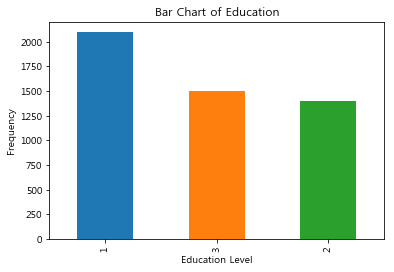

In [8]:
# 교육수준에 대한 막대그래프를 이용한 파악
df_data.Education.value_counts().plot(kind='bar')
plt.title('Bar Chart of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

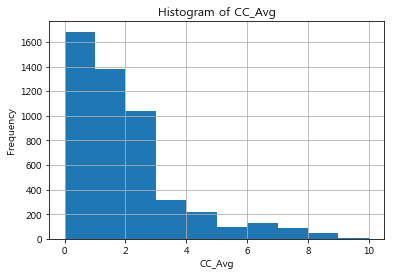

In [12]:
# 월평균 신용카드 지출액에 대한 히스토그램을 이용한 파악
df_data.CC_Avg.hist()
plt.title('Histogram of CC_Avg')
plt.xlabel('CC_Avg')
plt.ylabel('Frequency')

Text(0,0.5,'Percentage')

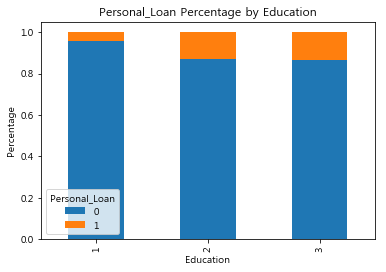

In [13]:
# 개인대출 프로모션 반응여부별 월 평균 신용카드 지출액 누적 막대그래프를 이용한 파악
Personal_Loan_Education = pd.crosstab(df_data.Education, df_data.Personal_Loan)
Personal_Loan_Education.div(Personal_Loan_Education.sum(axis=1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Personal_Loan Percentage by Education')
plt.xlabel('Education')
plt.ylabel('Percentage')

## 데이터 전처리

In [14]:
# 분석 비대상 데이터 제거
df_data = df_data.drop(df_data.columns[[0, 4]], axis=1)
df_data.head()

,Age,Experience,Income,Family,CC_Avg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [15]:
# 데이터에서 레이블 변수 분리
df_data_label = df_data.Personal_Loan
df_data_label.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64

In [16]:
# 데이터에서 특성 변수 분리
df_data_feature = df_data.iloc[:,[0,1,3,5,9]]
df_data_feature.head()

,Age,Experience,Family,Education,CD_Account
0,25,1,4,1,0
1,45,19,3,1,0
2,39,15,1,1,0
3,35,9,1,2,0
4,35,8,4,2,0


In [17]:
# 훈련 및 검증 데이터 분할추출
X_train, X_test, y_train, y_test = train_test_split(df_data_feature, df_data_label, test_size=0.25) #, random_state=1234)

In [18]:
# 훈련 데이터의 특성 값 확인
X_train.head()

,Age,Experience,Family,Education,CD_Account
4288,42,17,1,3,0
582,44,18,1,3,0
4059,53,27,4,3,0
322,63,39,1,1,1
2804,56,32,3,1,0


In [19]:
# 훈련 데이터의 특성 값 갯수 확인
len(X_train)

3750

In [20]:
# 검증 데이터의 특성 값 확인
X_test.head()

,Age,Experience,Family,Education,CD_Account
1659,33,7,1,3,1
4573,46,20,2,3,1
3757,45,21,1,2,0
3285,38,13,3,2,0
2919,35,10,3,1,1


In [21]:
# 검증 데이터의 특성 갯수 확인
len(X_test)

1250

In [22]:
# 훈련 데이터의 레이블 값 확인
y_train.head()

4288    0
582     0
4059    0
322     1
2804    0
Name: Personal_Loan, dtype: int64

In [23]:
# 훈련 데이터의 레이블 갯수 확인
len(y_train)

3750

In [24]:
# 검증 데이터의 레이블 값 확인
y_test.head()

1659    1
4573    0
3757    1
3285    0
2919    0
Name: Personal_Loan, dtype: int64

In [25]:
# 검증 데이터의 레이블 갯수 확인
len(y_test)

1250

## 모델 설정

In [33]:
# 모델 설정
model = SVC(
            C=10.0, # [1,10,100]
            #cache_size=200,
            #class_weight=None,
            #coef0=0.0,
            #decision_function_shape='ovr',
            #degree=3,
            #gamma='auto',
            gamma=10000, # [10,100,1000,10000]
            #kernel='rbf', # ['linear', 'rbf']
            #max_iter=-1,
            #probability=False,
            #random_state=None,
            #shrinking=True,
            #tol=0.001,
            #verbose=False,
            )
model

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10000, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
# 설정된 모델을 이용한 훈련
model.fit(X_train, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10000, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
# 모델에 검증 데이터를 적용하여 예측
y_pred = model.predict(X_test)

## 모델 평가

In [36]:
# 모델 평가
print("** Model Evaluation **\n")
#confusion_matrix = confusion_matrix(y_test, y_pred)
#confusion_matrix
#true_negative, false_positive, false_negative, true_positive = confusion_matrix( y_true=df_TestLabels, y_pred=df_TestLabelsPred ).ravel()
#df_freq = pd.value_counts(y_test['Y2']).to_frame().reset_index()
df_freq = pd.value_counts(y_test).to_frame().reset_index()
print("[Frequency]\n", df_freq)
print("\n[Evaluation Score]")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

** Model Evaluation **

[Frequency]
    index  Personal_Loan
0      0           1140
1      1            110

[Evaluation Score]
Accuracy: 0.9032


In [37]:
# 다수의 교차검증을 통한 모델의 정확도 파악
scores = cross_val_score(SVC(), X_train, y_train, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[0.904      0.90266667 0.904      0.90133333 0.89733333]
0.9018666666666666


### End of Document